<a href="https://colab.research.google.com/github/Preethi-sree/cricket-analysis/blob/main/cricket%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")

In [8]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [9]:
matches_df.tail()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [10]:
matches_df.shape

(1095, 20)

In [11]:
matches_df.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
matches_df.dropna(subset=["winner"], inplace=True)

In [12]:
team_wins = matches_df.groupby(["season", "winner"]).size().reset_index(name="wins")


In [13]:
team_matches = pd.melt(matches_df, id_vars=["season", "id"], value_vars=["team1", "team2"],
                       var_name="team_role", value_name="team")
team_matches = team_matches.groupby(["season", "team"]).size().reset_index(name="matches_played")

In [14]:
team_performance = pd.merge(team_matches, team_wins, left_on=["season", "team"], right_on=["season", "winner"], how="left")
team_performance["wins"] = team_performance["wins"].fillna(0)
team_performance["win_percentage"] = (team_performance["wins"] / team_performance["matches_played"]) * 100


In [16]:
team_performance = team_performance.drop(columns=["winner"])

KeyError: "['winner'] not found in axis"

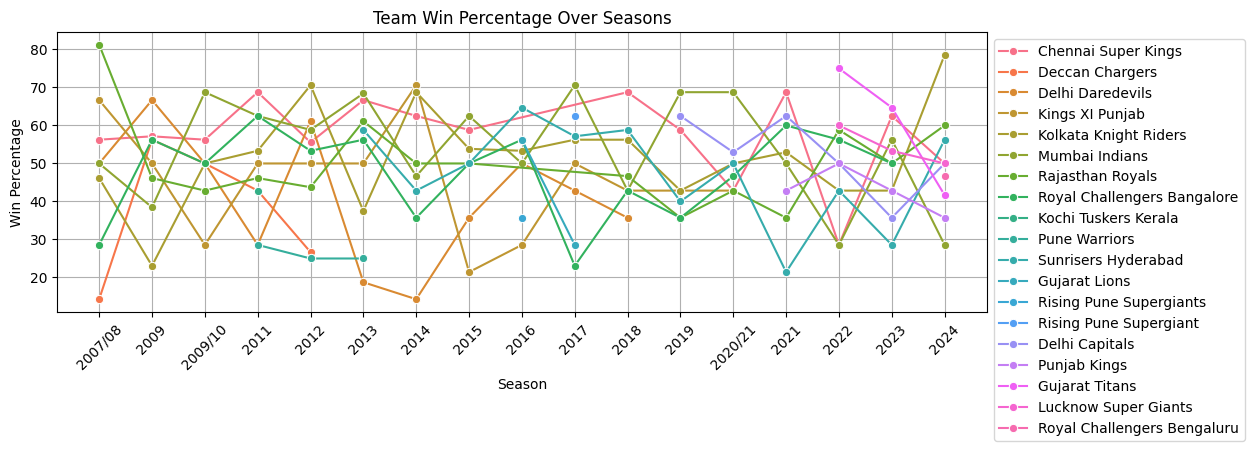

In [17]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.lineplot(data=team_performance, x="season", y="win_percentage", hue="team", marker="o")
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.title("Team Win Percentage Over Seasons")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

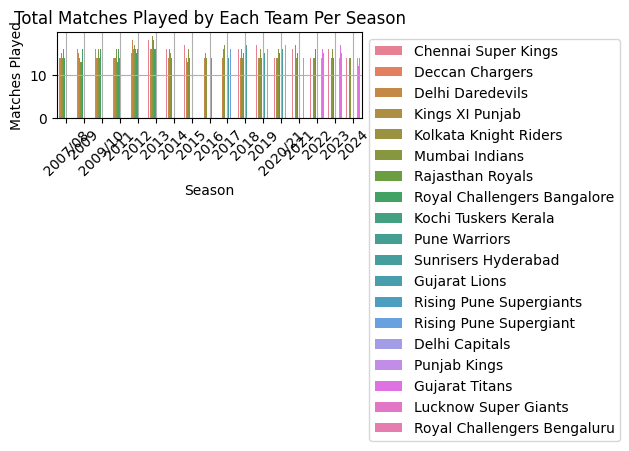

In [20]:
plt.subplot(2, 1, 2)
sns.barplot(data=team_performance, x="season", y="matches_played", hue="team")
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Matches Played")
plt.title("Total Matches Played by Each Team Per Season")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()

plt.show()